# Predictive analytics with titanic data set

### Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data/train_titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.shape

(891, 12)

In [7]:
data_mod1=data.drop(["Cabin"],axis=1)

In [8]:
data_mod1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
data_mod1.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
data_mod1.Embarked=data_mod1.Embarked.fillna(method="ffill")

In [11]:
data_mod1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [12]:
data_mod1.Age.values[:20]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.,  4., 58., 20.,
       39., 14., 55.,  2., nan, 31., nan])

In [13]:
data_mod1.Age=data_mod1.Age.fillna(value=data_mod1.Age.mean())

In [14]:
data_mod1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
data_mod1.Age.values[:20]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765])

In [16]:
data_mod1.Age=data_mod1.Age.apply(round)

In [17]:
data_mod1.Age.values[:20]

array([22, 38, 26, 35, 35, 30, 54,  2, 27, 14,  4, 58, 20, 39, 14, 55,  2,
       30, 31, 30], dtype=int64)

In [18]:
data_mod1.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [19]:
data_mod1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.754209,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.000828,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
sex_and_survival=data_mod1[['Sex',"Survived"]]

In [21]:
male_survived=sex_and_survival[(sex_and_survival.Survived==1) & (sex_and_survival.Sex=="male")]

In [22]:
len(male_survived)

109

In [23]:
male_survival=sex_and_survival[sex_and_survival.Sex=="male"]

In [28]:
len(male_survival)

891

In [29]:
male_survived_not=len(male_survival)-len(male_survived)

In [30]:
male_survived_not

782

In [31]:
female_survival=sex_and_survival[sex_and_survival.Sex=="female"]

In [32]:
number_of_female_survived=len(female_survival[female_survival.Survived==1])

In [33]:
number_of_female_survived

233

In [34]:
number_of_female_survived_not=len(female_survival)-number_of_female_survived

In [35]:
number_of_female_survived_not

81

In [36]:
81+233+468+109

891

In [46]:
survived=[len(male_survived),number_of_female_survived]
survived_not=[male_survived_not,number_of_female_survived_not]
sex_=["Male","Female"]
sex_code=np.array([1,2])

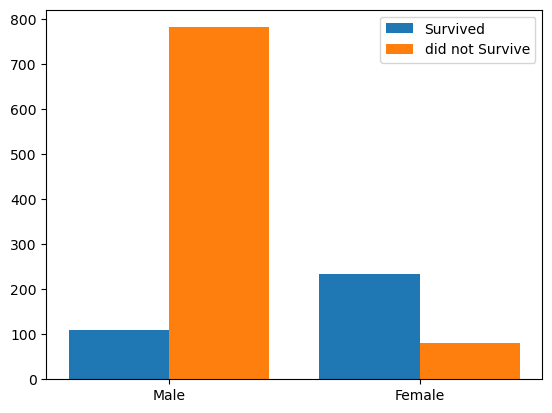

In [48]:
plt.bar(sex_code,survived,width=0.4,label='Survived')
plt.bar(sex_code+0.4,survived_not,width=0.4,label='did not Survive')
plt.xticks([1.2,2.2],sex_)
plt.legend()

In [49]:
data_mod1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [50]:
# data_mod2=data_mod1.drop(["Name","Ticket",'Embarked'])
data_mod1.Sex=data_mod1.Sex.map({"male":1,"female":0})

In [51]:
data_mod1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S


In [52]:
data_mod2=data_mod1.drop(["Name","Ticket",'Embarked'],axis=1)

In [53]:
data_mod2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,7.2500
1,2,1,1,0,38,1,0,71.2833
2,3,1,3,0,26,0,0,7.9250
3,4,1,1,0,35,1,0,53.1000
4,5,0,3,1,35,0,0,8.0500


In [54]:
X,y=data_mod2.drop(['PassengerId',"Survived"],axis=1),data_mod2.Survived

In [55]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22,1,0,7.2500
1,1,0,38,1,0,71.2833
2,3,0,26,0,0,7.9250
3,1,0,35,1,0,53.1000
4,3,1,35,0,0,8.0500


In [56]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
logistic=LogisticRegression()


In [62]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [63]:
logistic.score(X_train,y_train)

0.7979041916167665

In [64]:
logistic.score(X_test,y_test)

0.8071748878923767

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(23)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7130044843049327

In [66]:
from sklearn import metrics
metrics.confusion_matrix(y_test,logistic.predict(X_test))

array([[116,  18],
       [ 25,  64]], dtype=int64)